In [122]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot

In [123]:
df=pd.read_csv('projectos_forvia.csv')

In [124]:
#Rellenamos nulos
df =df.fillna(method="bfill")
df =df.fillna(method="ffill")
df =df.fillna(method="bfill")

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_21944/4154069975.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_21944/4154069975.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="ffill")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_21944/4154069975.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")


In [125]:
valores_nulos=df.isnull().sum()
valores_nulos

Number                    0
Active                    0
Project Name              0
Project Type              0
Geographical scope        0
Project manager           0
State                     0
Percent complete          0
Project size              0
Project organization      0
Planned Go Live date      0
Project target phase      0
Actual Go Live date       0
Actual end date         246
BG                        0
Closed                    0
Domain                    0
Domain Path               0
Last WAR                  0
Project Health            0
Project type              0
Recurrent activity        0
Planned start date        0
Actual start date         0
On-hold                   0
dtype: int64

In [126]:
df.columns

Index(['Number', 'Active', 'Project Name', 'Project Type',
       'Geographical scope', 'Project manager', 'State', 'Percent complete',
       'Project size', 'Project organization', 'Planned Go Live date',
       'Project target phase', 'Actual Go Live date', 'Actual end date', 'BG',
       'Closed', 'Domain', 'Domain Path', 'Last WAR', 'Project Health',
       'Project type', 'Recurrent activity', 'Planned start date',
       'Actual start date', 'On-hold'],
      dtype='object')

In [127]:
df.head(21)

,Number,Active,Project Name,Project Type,Geographical scope,Project manager,State,Percent complete,Project size,Project organization,...,Closed,Domain,Domain Path,Last WAR,Project Health,Project type,Recurrent activity,Planned start date,Actual start date,On-hold
0,PRJ0075198,VERDADERO,TCO - FIS - ABRERA - VW210 IP,Shopfloor JIT/TCO,ABRERA FIS,BENAVENT Pablo,Work in progress,26.47,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,26/09/2024 14:07:50,global,/,PRJSTAT0075304,Green,Regular,FALSO,1/2/2025 17:01,18/01/2024 08:00:00,FALSO
1,PRJ0073962,VERDADERO,TCO - FCM - ALLENJOIE FHS - GEN2 New automated...,Shopfloor JIT/TCO,ALLENJOIE FCM,MAUVAIS Julien,Work in progress,52.17,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,26/09/2024 14:07:50,global,/,PRJSTAT0075248,Yellow,Regular,FALSO,18/01/2024 08:00:00,18/01/2024 08:00:00,VERDADERO
2,PRJ0074556,VERDADERO,TCO - FCM - ALLENJOIE FHS - Tank XL,Shopfloor JIT/TCO,ALLENJOIE FHS,THIERY Jean-Francois,Work in progress,95.85,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,26/09/2024 14:07:50,global,/,PRJSTAT0075265,Yellow,Regular,FALSO,12/8/2024 8:00,12/8/2024 8:00,FALSO
3,PRJ0075087,VERDADERO,TCO - FCM - ALLENJOIE FHS - STELLANTIS - XL694...,Shopfloor JIT/TCO,ALLENJOIE FHS,MAUVAIS Julien,Work in progress,20.90,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,26/09/2024 14:07:50,global,/,PRJSTAT0075325,Green,Regular,FALSO,8/1/2025 8:00,15/01/2025 09:52:03,VERDADERO
4,PRJ0075456,VERDADERO,TCO – FCM - ALMUSSAFES - FORD - C482 Welding l...,Shopfloor JIT/TCO,ALMUSSAFES FCM,BENAVENT Pablo,Work in progress,24.30,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,26/09/2024 14:07:50,global,/,PRJSTAT0075307,Green,Regular,FALSO,12/5/2025 8:00,12/5/2025 8:00,FALSO
5,PRJ0075560,VERDADERO,Deployment NEO for ANH,Shopfloor LES/NEO,ANTING FCM,LONG Pu,Work in progress,13.18,LARGE,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA MES ...,...,26/09/2024 14:07:50,global,/,PRJSTAT0075266,Green,Regular,FALSO,6/5/2025 8:00,3/6/2025 10:38,FALSO
6,PRJ0074540,VERDADERO,Reaplicação de request Dzyon,FCS roll-outs,ARGENTINA,SOUZA Alexandre,Work in progress,99.25,MEDIUM,GIS/ITOP SAO./IT OP SAO shared/ITOP SAO FCS & ...,...,26/09/2024 14:07:50,global,/,PRJSTAT0074102,Yellow,Regular,FALSO,2/9/2024 8:00,20/09/2024 13:33:46,VERDADERO
7,PRJ0074770,VERDADERO,EWM - FIS - ARGES - INBOUND PROCESS,Shopfloor LES/NEO,ARGES CATEASCA,RADA Oana,Work in progress,91.45,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,26/09/2024 14:07:50,global,/,PRJSTAT0075344,Green,Regular,FALSO,14/10/2024 08:00:00,24/10/2024 13:21:09,FALSO
8,PRJ0075195,VERDADERO,FCS Plant Maintenance & Mobility - FIS Arges -...,FCS roll-outs,ARGES CATEASCA,HEILES Horst,Work in progress,93.30,LARGE,GIT/IT EMEA/Applications rollouts & Level 2 Su...,...,26/09/2024 14:07:50,global,/,PRJSTAT0075377,Green,Regular,FALSO,14/02/2025 08:00:00,7/3/2025 10:36,FALSO
9,PRJ0074625,VERDADERO,E-supply retrofit project,New software or release,ASIA,LEI Oscar,Work in progress,9.98,LARGE,GIS/ITOP ASIA/IT OP Asia Shared/ITOP ASIA Regi...,...,26/09/2024 14:07:50,global,/,PRJSTAT0075170,Green,Regular,FALSO,19/09/2024 08:00:00,29/09/2024 04:04:17,FALSO


**Percent complete**

<Axes: title={'center': 'Percent complete'}, xlabel='Project size'>

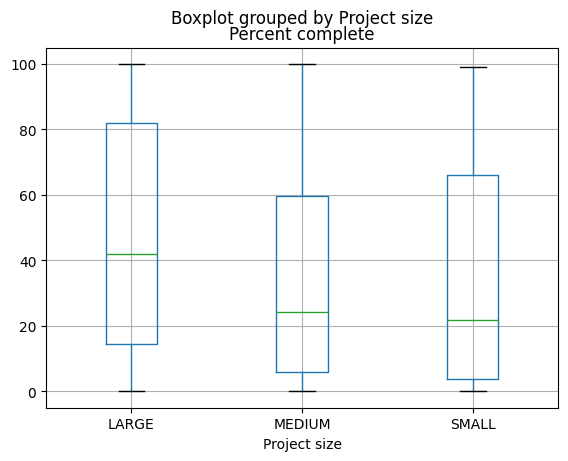

In [128]:
#Analizamos los diagrama de caja de la variable objetivo "Percent complete" por cada categoria 
# de la variable independiente "Project size"
df.boxplot("Percent complete", by= "Project size")

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_21944/2981799166.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="Project size", y="Percent complete", ci=95)


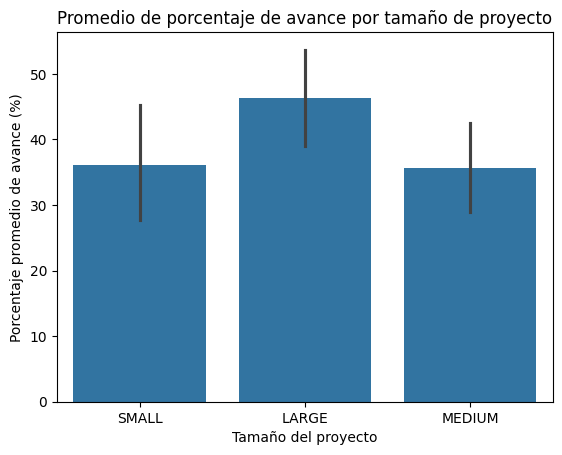

In [129]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="Project size", y="Percent complete", ci=95)
plt.title("Promedio de porcentaje de avance por tamaño de proyecto")
plt.ylabel("Porcentaje promedio de avance (%)")
plt.xlabel("Tamaño del proyecto")
plt.show()

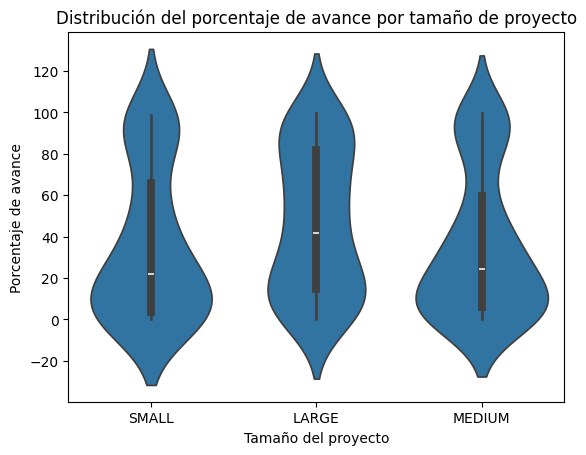

In [130]:
# Gráfico de violín
sns.violinplot(data=df, x="Project size", y="Percent complete", inner="box")
plt.title("Distribución del porcentaje de avance por tamaño de proyecto")
plt.ylabel("Porcentaje de avance")
plt.xlabel("Tamaño del proyecto")
plt.show()

In [131]:
#Obtengo las categorías de la variable (pclass)
grupos=pd.unique(df['Project size'].values)
grupos

array(['SMALL', 'LARGE', 'MEDIUM'], dtype=object)

In [132]:
dfsize=df.copy()
dfsize.rename(columns={'Percent complete': 'Percent_complete'}, inplace=True)
dfsize.rename(columns={'Project size': 'Project_size'}, inplace=True)

In [133]:
#Defino grupos donde me entrega la columna Fare separada por grupos de las 
#categorías de la columna pclass: "1", "2" y "3" 
Fare_1= dfsize.Percent_complete[dfsize.Project_size=="SMALL"]
Fare_2= dfsize.Percent_complete[dfsize.Project_size=="LARGE"]
Fare_3= dfsize.Percent_complete[dfsize.Project_size=="MEDIUM"]

In [134]:
anova= stats.f_oneway(Fare_1, Fare_2, Fare_3)
anova

F_onewayResult(statistic=np.float64(2.4105859832843404), pvalue=np.float64(0.09190642162915041))

**STATESMODELS (ANOVA)**

In [135]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod= ols('Percent_complete ~ Project_size', data=dfsize).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                 df         sum_sq      mean_sq         F    PR(>F)
Project_size    2.0    5945.169016  2972.584508  2.410586  0.091906
Residual      243.0  299652.466436  1233.137722       NaN       NaN


In [136]:
dfsize.rename(columns={'Project Health': 'Project_Health'}, inplace=True)

In [137]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('Percent_complete ~ Project_Health + Project_size + Project_Health:Project_size', data=dfsize).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                                df         sum_sq      mean_sq         F  \
Project_Health                 1.0     255.200830   255.200830  0.210189   
Project_size                   2.0    5747.474890  2873.737445  2.366876   
Project_Health:Project_size    2.0    8199.527456  4099.763728  3.376660   
Residual                     240.0  291395.432276  1214.147634       NaN   

                               PR(>F)  
Project_Health               0.647034  
Project_size                 0.095959  
Project_Health:Project_size  0.035792  
Residual                          NaN  


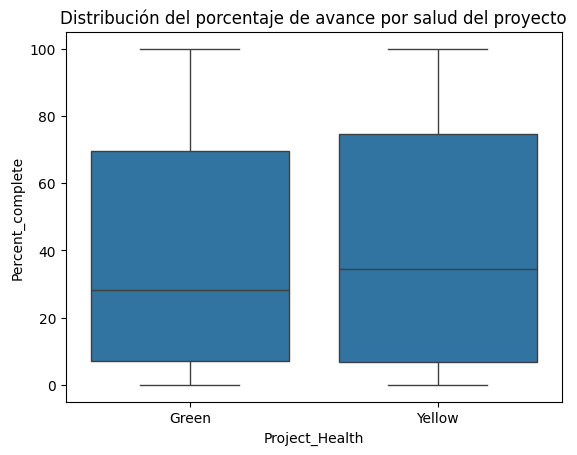

In [138]:
#Grafica variable fare vs sex
sns.boxplot(data=dfsize, x='Project_Health', y='Percent_complete')
plt.title("Distribución del porcentaje de avance por salud del proyecto")
plt.show()


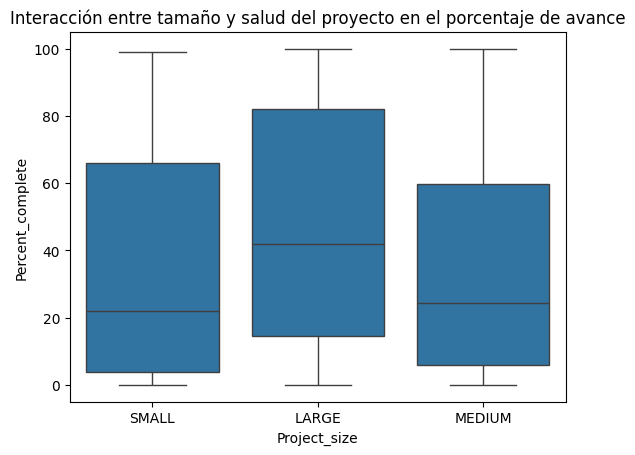

In [139]:
#Grafica variable fare vs pclass
sns.boxplot(data=dfsize, x='Project_size', y='Percent_complete')
plt.title("Interacción entre tamaño y salud del proyecto en el porcentaje de avance")
plt.show()

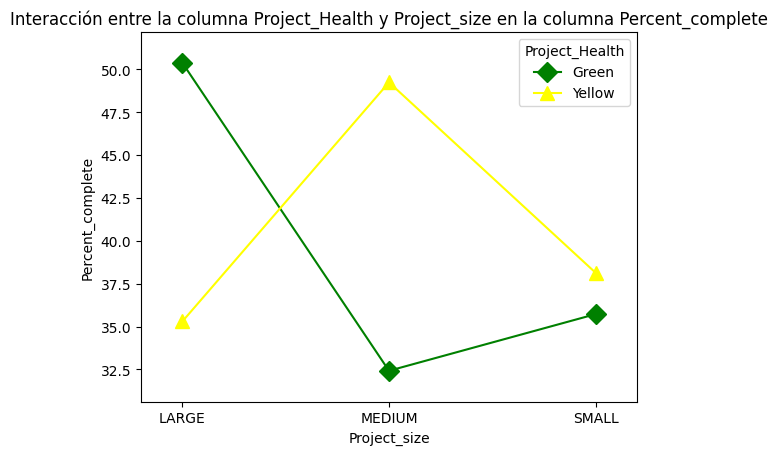

In [140]:
fig = interaction_plot(dfsize['Project_size'], dfsize['Project_Health'], dfsize['Percent_complete'],
                       colors=['green', 'yellow'], markers=['D', '^'], ms=10)
plt.title("Interacción entre la columna Project_Health y Project_size en la columna Percent_complete")
plt.xlabel("Project_size")
plt.ylabel("Percent_complete")
plt.show()

**Project size**

In [141]:
df.columns

Index(['Number', 'Active', 'Project Name', 'Project Type',
       'Geographical scope', 'Project manager', 'State', 'Percent complete',
       'Project size', 'Project organization', 'Planned Go Live date',
       'Project target phase', 'Actual Go Live date', 'Actual end date', 'BG',
       'Closed', 'Domain', 'Domain Path', 'Last WAR', 'Project Health',
       'Project type', 'Recurrent activity', 'Planned start date',
       'Actual start date', 'On-hold'],
      dtype='object')

In [142]:
import numpy as np
import pandas as pd

# Revisa tipos
print(dfsize[['Project_size','On-hold']].dtypes)
print(dfsize[['Project_size','On-hold']].head())


Project_size    object
On-hold         object
dtype: object
  Project_size    On-hold
0        SMALL      FALSO
1        LARGE  VERDADERO
2       MEDIUM      FALSO
3        SMALL  VERDADERO
4       MEDIUM      FALSO


In [143]:
# Mapear categorías de tamaño de proyecto a números
dfsize['Project_size'] = dfsize['Project_size'].replace({
    'SMALL': 1,
    'MEDIUM': 2,
    'LARGE': 3
})


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_21944/369464092.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfsize['Project_size'] = dfsize['Project_size'].replace({


<Axes: title={'center': 'Project_size'}, xlabel='On-hold'>

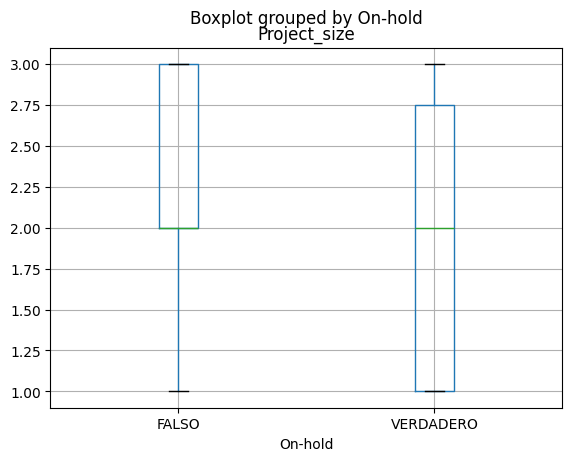

In [144]:
#Analizamos los diagrama de caja de la variable objetivo "tarifa" por cada categoria 
# de la variable independiente "pclass"
dfsize.boxplot("Project_size", by= "On-hold")

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_21944/2419056223.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=dfsize, x="On-hold", y="Project_size", ci=95)


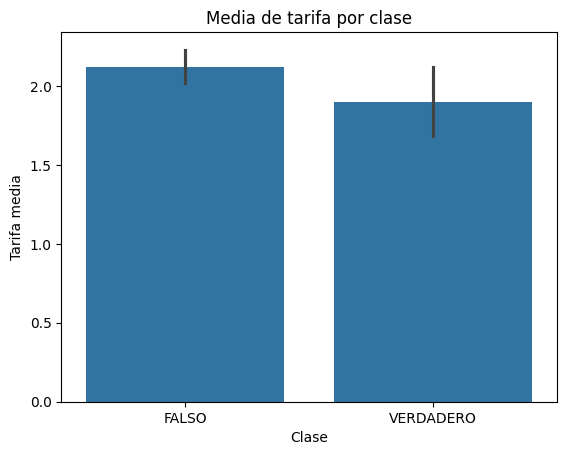

In [145]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=dfsize, x="On-hold", y="Project_size", ci=95)
plt.title("Media de tarifa por clase")
plt.ylabel("Tarifa media")
plt.xlabel("Clase")
plt.show()

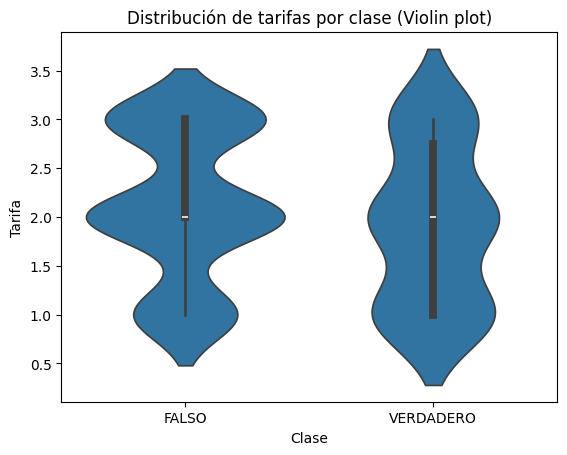

In [146]:
sns.violinplot(data=dfsize, x="On-hold", y="Project_size", inner="box")
plt.title("Distribución de tarifas por clase (Violin plot)")
plt.ylabel("Tarifa")
plt.xlabel("Clase")
plt.show()

In [147]:
#Obtengo las categorías de la variable (pclass)
grupos=pd.unique(df['On-hold'].values)
grupos

array(['FALSO', 'VERDADERO'], dtype=object)

In [148]:
dfsize.rename(columns={'On-hold': 'Onhold'}, inplace=True)

In [149]:
#Defino grupos donde me entrega la columna Fare separada por grupos de las 
#categorías de la columna pclass: "1", "2" y "3" 
Fare_1= dfsize.Project_size[dfsize.Onhold=="FALSO"]
Fare_2= dfsize.Project_size[dfsize.Onhold=="VERDADERO"]

In [150]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable 
# cuantitativa
anova= stats.f_oneway(Fare_1, Fare_2)
anova

F_onewayResult(statistic=np.float64(3.4464887048519555), pvalue=np.float64(0.0645916545028568))

**STATESMODELS (ANOVA)**

In [151]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod= ols('Project_size ~ Onhold', data=dfsize).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

             df      sum_sq   mean_sq         F    PR(>F)
Onhold      1.0    1.971296  1.971296  3.446489  0.064592
Residual  244.0  139.561224  0.571972       NaN       NaN


In [152]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('Project_size ~ State + Onhold + State:Onhold', data=dfsize).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                 df      sum_sq   mean_sq         F    PR(>F)
State           2.0    3.087957  1.543978  2.746997  0.066129
Onhold          1.0    0.968146  0.968146  1.722495  0.190621
State:Onhold    2.0    3.987918  1.993959  3.547589  0.030307
Residual      241.0  135.456557  0.562060       NaN       NaN


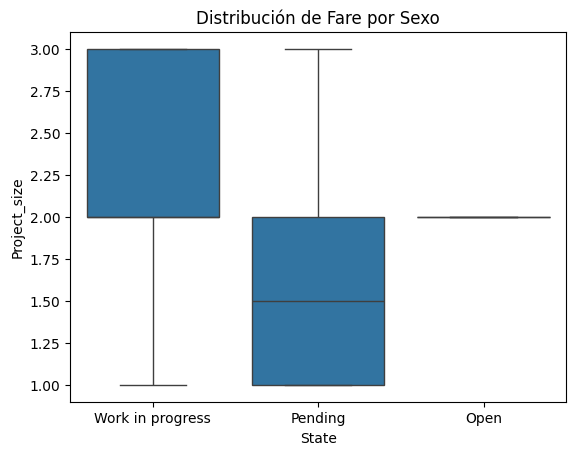

In [153]:
#Grafica variable fare vs sex
sns.boxplot(data=dfsize, x='State', y='Project_size')
plt.title("Distribución de Fare por Sexo")
plt.show()


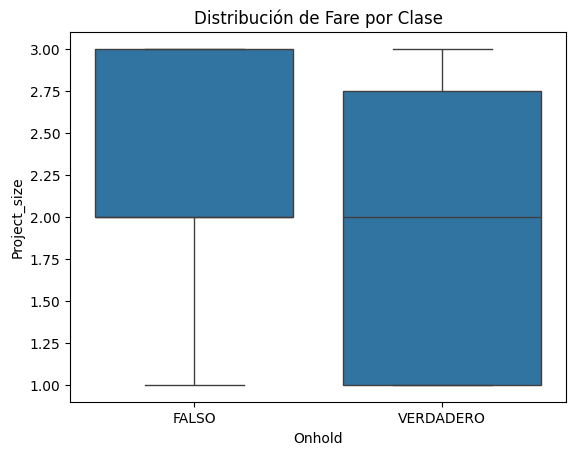

In [154]:
#Grafica variable fare vs pclass
sns.boxplot(data=dfsize, x='Onhold', y='Project_size')
plt.title("Distribución de Fare por Clase")
plt.show()

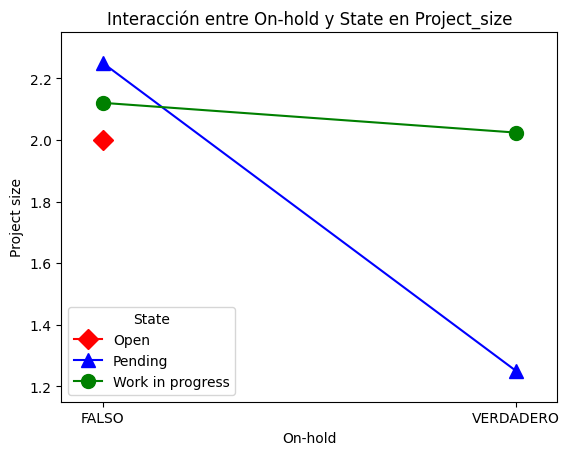

In [155]:
fig = interaction_plot(dfsize['Onhold'], dfsize['State'], dfsize['Project_size'],
                       colors=['red', 'blue', 'green'],  # uno por cada State
                       markers=['D', '^', 'o'],          # también uno por cada State
                       ms=10)
plt.title("Interacción entre On-hold y State en Project_size")
plt.xlabel("On-hold")
plt.ylabel("Project size")
plt.show() 


**Project Health**

In [156]:
dfhealth=df.copy()

In [157]:
dfhealth.rename(columns={'Project size': 'Project_size'}, inplace=True)
dfhealth.rename(columns={'Project Health': 'Project_Health'}, inplace=True)

In [158]:
# Revisa tipos
print(dfhealth[['Project_Health','Project_size']].dtypes)
print(dfhealth[['Project_Health','Project_size']].head())

Project_Health    object
Project_size      object
dtype: object
  Project_Health Project_size
0          Green        SMALL
1         Yellow        LARGE
2         Yellow       MEDIUM
3          Green        SMALL
4          Green       MEDIUM


In [159]:
# Mapear categorías de tamaño de proyecto a números
dfhealth['Project_Health'] = dfhealth['Project_Health'].replace({
    'Green': 1,
    'Yellow': 2
})


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_21944/1400903721.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfhealth['Project_Health'] = dfhealth['Project_Health'].replace({


<Axes: title={'center': 'Project_Health'}, xlabel='Project_size'>

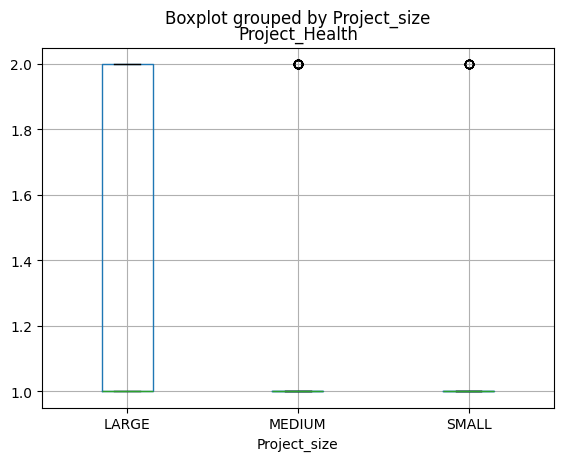

In [160]:
#Analizamos los diagrama de caja de la variable objetivo "tarifa" por cada categoria 
# de la variable independiente "pclass"
dfhealth.boxplot("Project_Health", by= "Project_size")

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_21944/2360225238.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=dfhealth, x="Project_size", y="Project_Health", ci=95)


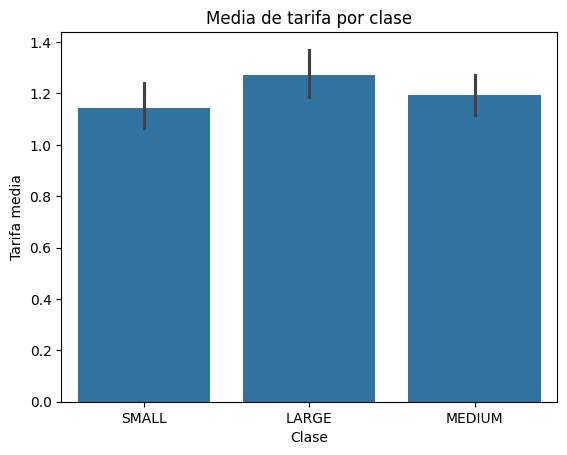

In [161]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=dfhealth, x="Project_size", y="Project_Health", ci=95)
plt.title("Media de tarifa por clase")
plt.ylabel("Tarifa media")
plt.xlabel("Clase")
plt.show()

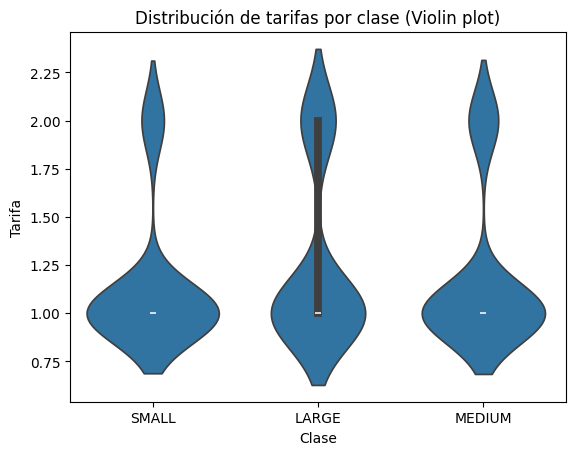

In [162]:
# Gráfico de violín
sns.violinplot(data=dfhealth, x="Project_size", y="Project_Health", inner="box")
plt.title("Distribución de tarifas por clase (Violin plot)")
plt.ylabel("Tarifa")
plt.xlabel("Clase")
plt.show()

In [163]:
#Obtengo las categorías de la variable (pclass)
grupos=pd.unique(dfhealth['Project_size'].values)
grupos

array(['SMALL', 'LARGE', 'MEDIUM'], dtype=object)

In [164]:
#Obtengo las categorías de la variable (pclass)
grupos=pd.unique(dfhealth['Project_Health'].values)
grupos

array([1, 2])

In [165]:
#Defino grupos donde me entrega la columna Fare separada por grupos de las 
#categorías de la columna pclass: "1", "2" y "3" 
Fare_1= dfhealth.Project_Health[dfhealth.Project_size=="SMALL"]
Fare_2= dfhealth.Project_Health[dfhealth.Project_size=="LARGE"]
Fare_3= dfhealth.Project_Health[dfhealth.Project_size=="MEDIUM"]

In [166]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable 
# cuantitativa
anova= stats.f_oneway(Fare_1, Fare_2, Fare_3)
anova

F_onewayResult(statistic=np.float64(1.805918124560989), pvalue=np.float64(0.16652189170722914))

**STATESMODELS (ANOVA)**

In [167]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod= ols('Project_Health ~ Project_size', data=dfhealth).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                 df     sum_sq   mean_sq         F    PR(>F)
Project_size    2.0   0.592085  0.296042  1.805918  0.166522
Residual      243.0  39.834745  0.163929       NaN       NaN


In [168]:
dfhealth.rename(columns={'On-hold': 'Onhold'}, inplace=True)

In [169]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('Project_Health ~ Onhold + Project_size + Onhold:Project_size', data=dfhealth).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                        df     sum_sq   mean_sq         F    PR(>F)
Onhold                 1.0   1.462952  1.462952  9.547215  0.002239
Project_size           2.0   0.831366  0.415683  2.712744  0.068389
Onhold:Project_size    2.0   1.356507  0.678253  4.426278  0.012951
Residual             240.0  36.776005  0.153233       NaN       NaN


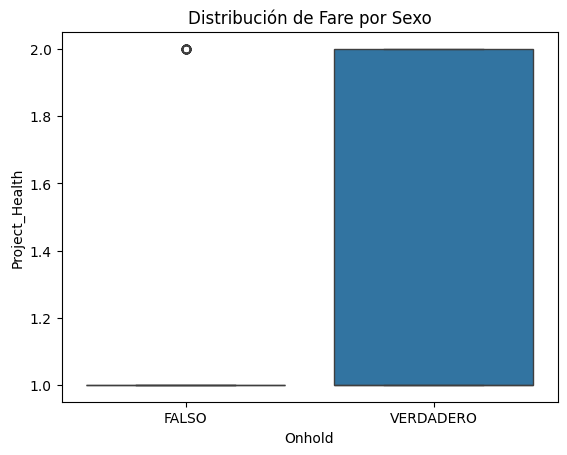

In [170]:
#Grafica variable fare vs sex
sns.boxplot(data=dfhealth, x='Onhold', y='Project_Health')
plt.title("Distribución de Fare por Sexo")
plt.show()

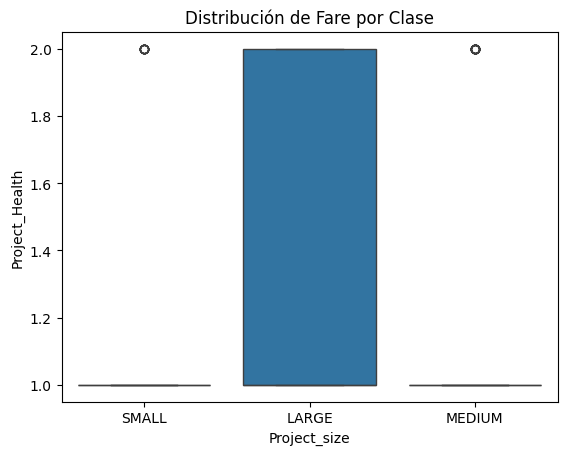

In [171]:
#Grafica variable fare vs pclass
sns.boxplot(data=dfhealth, x='Project_size', y='Project_Health')
plt.title("Distribución de Fare por Clase")
plt.show()

In [172]:
niveles = dfhealth['Onhold'].nunique()
niveles

2

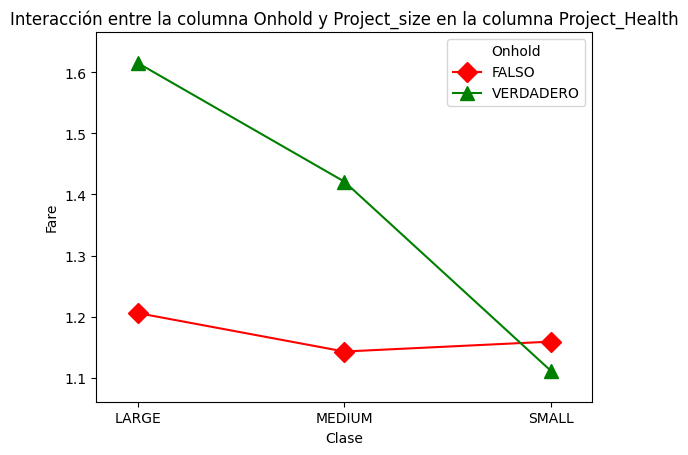

In [173]:
fig = interaction_plot(dfhealth['Project_size'], dfhealth['Onhold'], dfhealth['Project_Health'],
                       colors=['red', 'green'], markers=['D', '^'], ms=10)
plt.title("Interacción entre la columna Onhold y Project_size en la columna Project_Health")
plt.xlabel("Clase")
plt.ylabel("Fare")
plt.show()

**Project type**

esta variable se hizo en colaboracion con el profe con el codigo de cornejo el dia viernes en la secion de preguntas

In [174]:
dftype=df.copy()

In [175]:
df["Project type_num"] = df["Project Type"].astype("category").cat.codes

In [176]:
df["BG_cat"] = df["BG"].astype("category")
df["Project target phase_cat"] = df["Project target phase"].astype("category") 

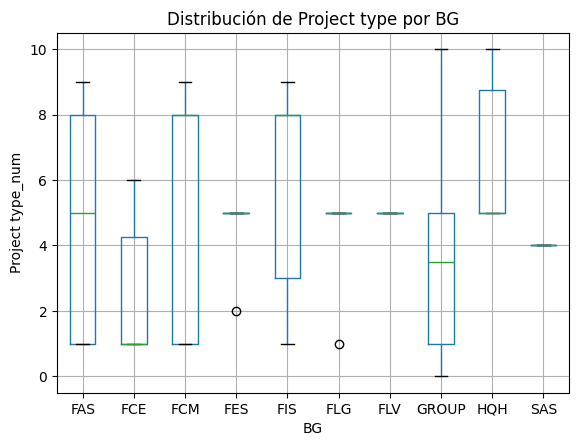

In [177]:
df.boxplot(column="Project type_num", by="BG_cat")
plt.title("Distribución de Project type por BG")
plt.suptitle("") 
plt.xlabel("BG")
plt.ylabel("Project type_num")
plt.show()

In [178]:
grupos=pd.unique(df['BG_cat'].values)
grupos

['FIS', 'FCM', 'GROUP', 'FAS', 'FCE', 'FES', 'HQH', 'FLV', 'FLG', 'SAS']
Categories (10, object): ['FAS', 'FCE', 'FCM', 'FES', ..., 'FLV', 'GROUP', 'HQH', 'SAS']

In [179]:
mod = ols('Q("Project type_num") ~ Q("BG_cat")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                df       sum_sq    mean_sq         F    PR(>F)
Q("BG_cat")    9.0   234.459794  26.051088  2.806317  0.003786
Residual     236.0  2190.792239   9.283018       NaN       NaN


In [180]:
mod = ols('Q("Project type_num") ~ Q("Project target phase_cat") + Q("BG_cat") + Q("Project target phase_cat"):Q("BG_cat")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                              df       sum_sq    mean_sq  \
Q("Project target phase_cat")                2.0    25.565059  12.782530   
Q("BG_cat")                                  9.0   218.568586  24.285398   
Q("Project target phase_cat"):Q("BG_cat")   18.0   239.044773  13.280265   
Residual                                   226.0  2124.318796   9.399641   

                                                  F    PR(>F)  
Q("Project target phase_cat")              1.359896  0.258780  
Q("BG_cat")                                2.583652  0.007499  
Q("Project target phase_cat"):Q("BG_cat")  1.412848  0.126610  
Residual                                        NaN       NaN  


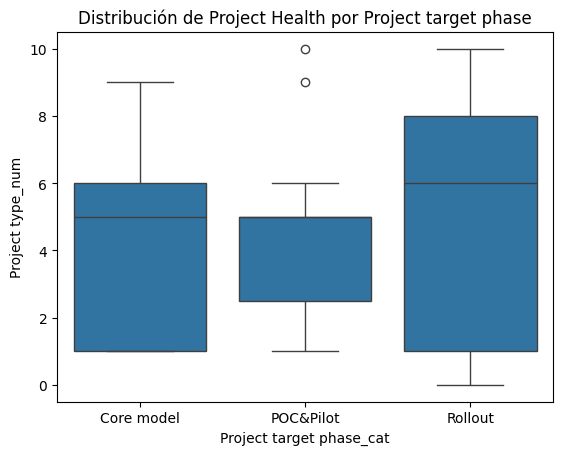

In [181]:
sns.boxplot(data=df, x='Project target phase_cat', y='Project type_num')
plt.title("Distribución de Project Health por Project target phase")
plt.show()

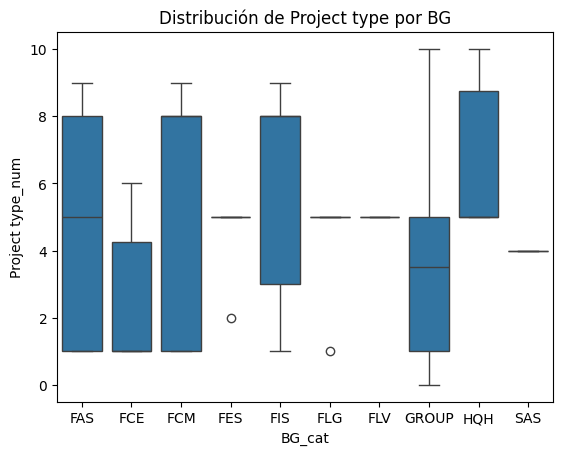

In [182]:
sns.boxplot(data=df, x='BG_cat', y='Project type_num')
plt.title("Distribución de Project type por BG")
plt.show()

In [183]:
df["BG_str"] = df["BG_cat"].astype(str)
df["Phase_str"] = df["Project target phase_cat"].astype(str)

In [184]:
trace_levels = df["Phase_str"].unique()
n_trace_levels = len(trace_levels)

In [185]:
base_markers = ['D', '^', 'o', 's', 'v', 'P', '*', 'X', 'h', '+']
base_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
markers = (base_markers * ((n_trace_levels // len(base_markers)) + 1))[:n_trace_levels]
colors = (base_colors * ((n_trace_levels // len(base_colors)) + 1))[:n_trace_levels]

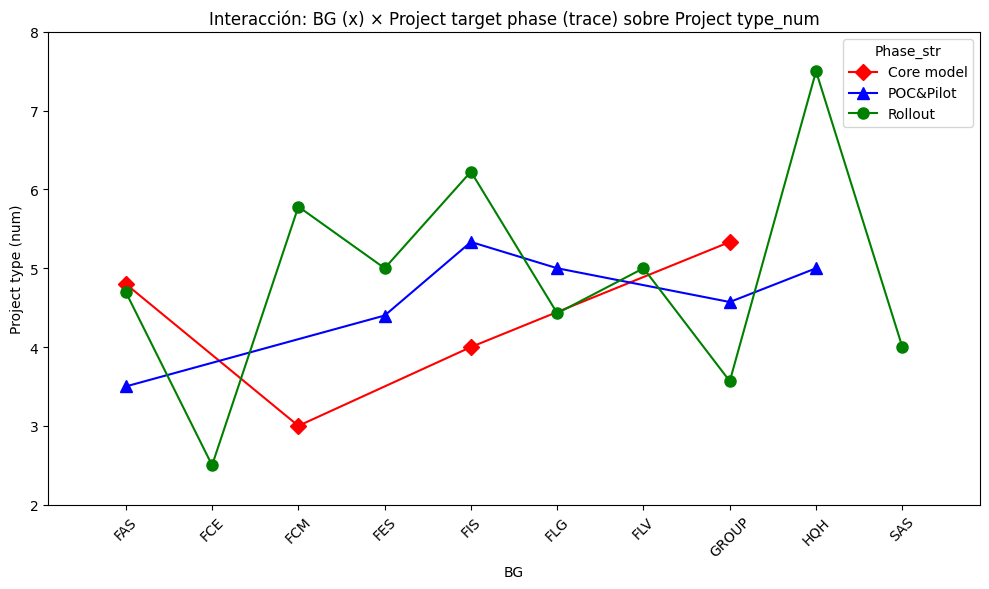

In [186]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
interaction_plot(
    x=df["BG_str"],              # eje X (categorías)
    trace=df["Phase_str"],       # líneas (cada nivel)
    response=df["Project type_num"],  # variable numérica
    colors=colors,
    markers=markers,
    ms=8,
    ax=ax
)

plt.title("Interacción: BG (x) × Project target phase (trace) sobre Project type_num")
plt.xlabel("BG")
plt.ylabel("Project type (num)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()